In [10]:
# importing the libraries:

# Upload and install models:
from joblib import dump, load

# matrix and mathematics operations:
import numpy as np

# Data handling:
import pandas as pd
from pandas.plotting import scatter_matrix

# Data Visualization:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# ML algorithms & tools:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, cross_val_score, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, RidgeClassifier
from sklearn.metrics import root_mean_squared_error, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBRegressor, XGBClassifier

# NN algorithms & tools:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
import tensorflow as tf


# Explore the data:


In [11]:
data = pd.read_csv(r'medicine.csv')
data.head(10)

,Date,Day_of_Week,Hour,Department,Staff_Count,Num_Patients,Average_Wait_Time,Emergency_Load,Label
0,2025-04-02,Wednesday,14,Emergency,10,33,68,Yes,High
1,2025-02-06,Monday,2,Surgery,10,5,17,Yes,Low
2,2025-01-03,Tuesday,8,Emergency,10,33,61,Yes,High
3,2025-04-08,Saturday,6,Emergency,13,22,38,Yes,High
4,2025-03-13,Thursday,23,Surgery,8,31,52,Yes,High
5,2025-02-06,Sunday,6,Emergency,13,29,57,Yes,High
6,2025-02-01,Saturday,2,Emergency,15,19,31,No,Medium
7,2025-02-27,Sunday,6,Cardiology,14,27,43,Yes,High
8,2025-07-24,Thursday,9,Surgery,9,17,33,No,Medium
9,2025-05-23,Saturday,0,Pediatrics,15,9,25,No,Low


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               10000 non-null  object
 1   Day_of_Week        10000 non-null  object
 2   Hour               10000 non-null  int64 
 3   Department         10000 non-null  object
 4   Staff_Count        10000 non-null  int64 
 5   Num_Patients       10000 non-null  int64 
 6   Average_Wait_Time  10000 non-null  int64 
 7   Emergency_Load     10000 non-null  object
 8   Label              10000 non-null  object
dtypes: int64(4), object(5)
memory usage: 703.2+ KB


In [13]:
def split_features(data_ : pd.DataFrame = None, print_ : bool = False) -> tuple:
    """
    :param data_: the data that you want to split it features
    :param print_: to print the name of the numerical and categorical features.
    :return: a tuple of obj_fea_ (categorical features) and num_fea_ (numerical features).
    """

    obj_fea_ = data_.select_dtypes(include= "object").columns.tolist()
    num_fea_ = data_.select_dtypes(include= "number").columns.tolist()

    if print_:
        print(f'the string features in dataset: {obj_fea_}')
        print(f'the string features in dataset: {num_fea_}')

    return obj_fea_, num_fea_

obj_fea, num_fea = split_features(data_= data, print_= True)

the string features in dataset: ['Date', 'Day_of_Week', 'Department', 'Emergency_Load', 'Label']
the string features in dataset: ['Hour', 'Staff_Count', 'Num_Patients', 'Average_Wait_Time']


In [14]:
data[num_fea].describe().T.style

,count,mean,std,min,25%,50%,75%,max
Hour,10000.000000,11.422300,6.938687,0.000000,5.000000,11.000000,17.000000,23.000000
Staff_Count,10000.000000,9.043700,3.749479,3.000000,6.000000,9.000000,12.000000,15.000000
Num_Patients,10000.000000,16.728500,9.873051,0.000000,9.000000,16.000000,23.000000,53.000000
Average_Wait_Time,10000.000000,34.588900,15.540787,5.000000,23.000000,33.000000,44.000000,95.000000


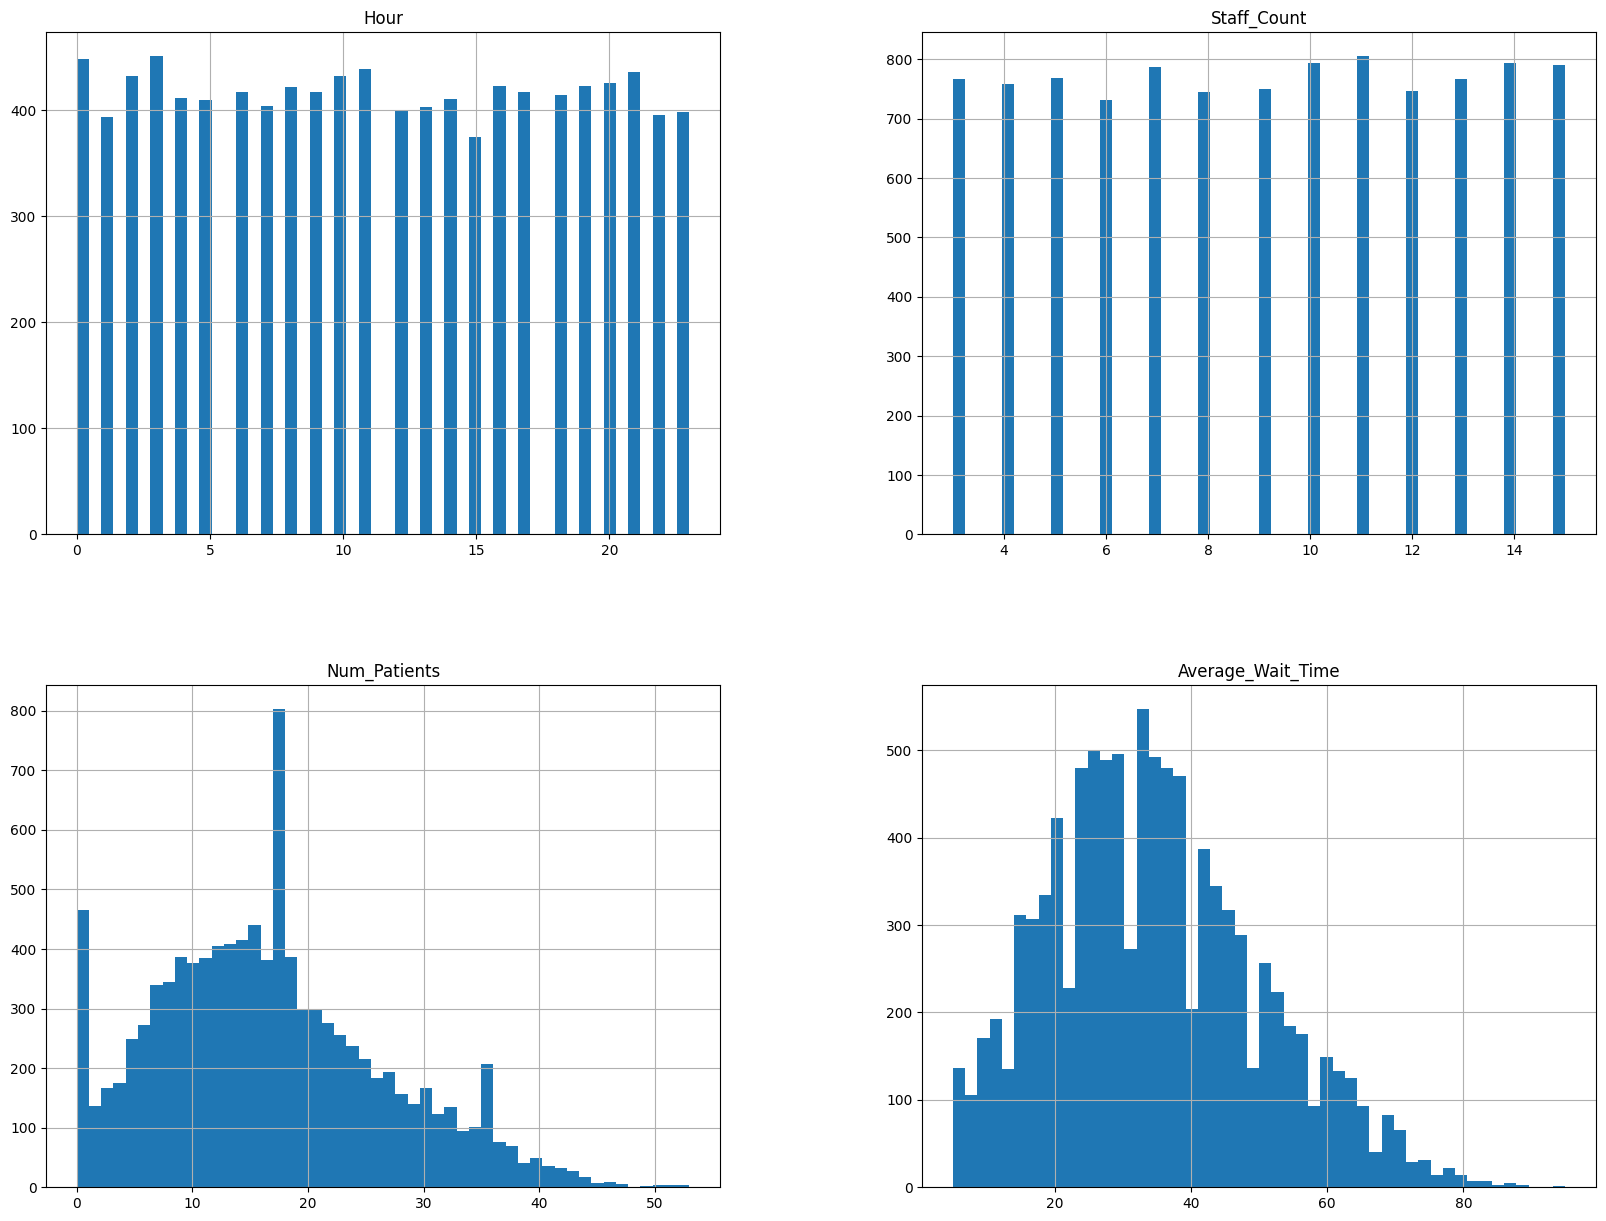

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
data[num_fea].hist(bins= 50, figsize= (20, 15))
plt.show()

# Visualizing the data :

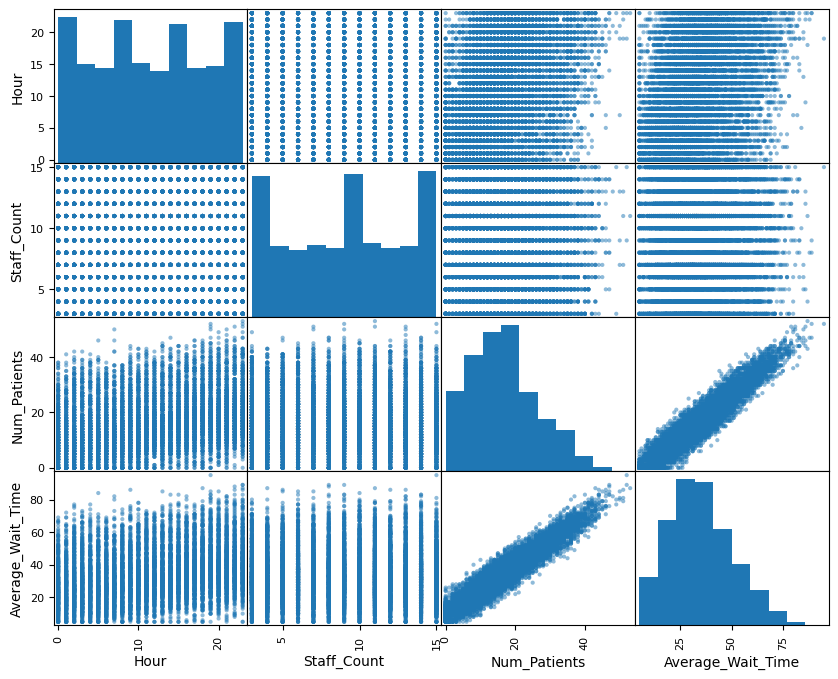

In [16]:
scatter_matrix(data[num_fea], figsize= (10,8))
plt.show()

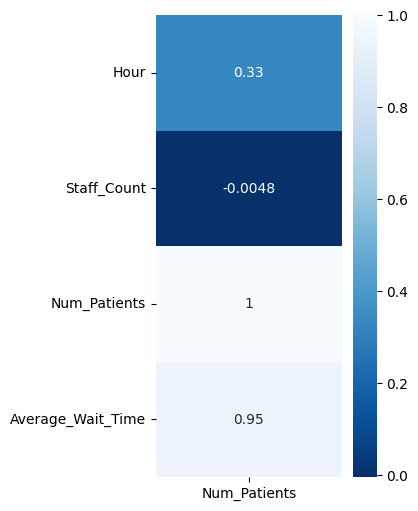

In [17]:
corr_mx = data[num_fea].corr()
corr_vr = corr_mx[["Num_Patients"]]

plt.figure(figsize=(3, 6))
sns.heatmap(corr_vr, annot= True, cmap= "Blues_r")
plt.show()

# Feature Extraction:
* Data -> convert to year, month, day, delete the year if it useless.

In [18]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.drop(labels= 'Date', axis= 1, inplace= True)
data.head()

,Day_of_Week,Hour,Department,Staff_Count,Num_Patients,Average_Wait_Time,Emergency_Load,Label,Year,Month,Day
0,Wednesday,14,Emergency,10,33,68,Yes,High,2025,4,2
1,Monday,2,Surgery,10,5,17,Yes,Low,2025,2,6
2,Tuesday,8,Emergency,10,33,61,Yes,High,2025,1,3
3,Saturday,6,Emergency,13,22,38,Yes,High,2025,4,8
4,Thursday,23,Surgery,8,31,52,Yes,High,2025,3,13


In [19]:
obj_fea, num_fea = split_features(data_= data, print_= True)

the string features in dataset: ['Day_of_Week', 'Department', 'Emergency_Load', 'Label']
the string features in dataset: ['Hour', 'Staff_Count', 'Num_Patients', 'Average_Wait_Time', 'Year', 'Month', 'Day']


c:\Users\MSI\miniconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\MSI\miniconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\MSI\miniconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


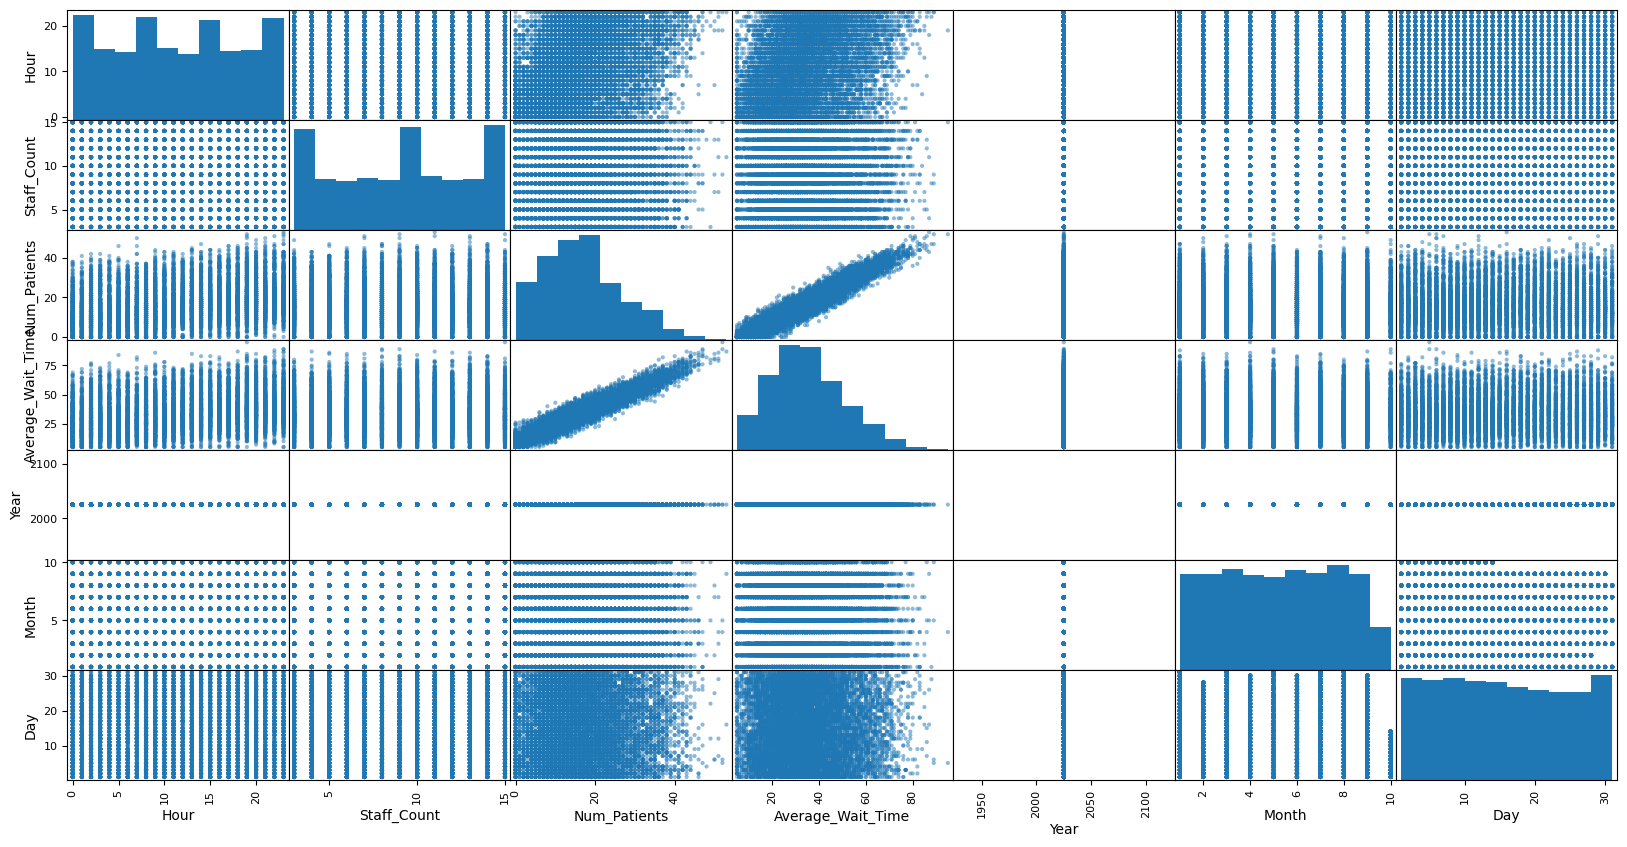

In [20]:
scatter_matrix(data[num_fea], figsize= (20,10))
plt.show()

<Axes: >

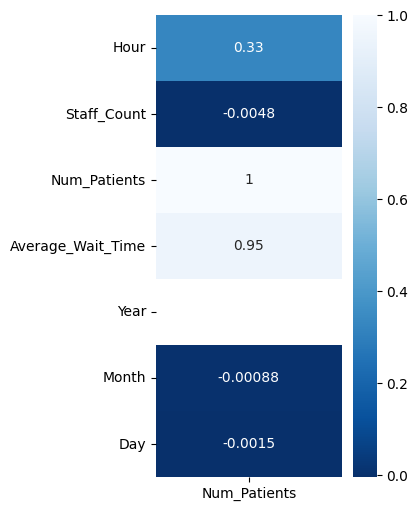

In [21]:
corr_mx = data[num_fea].corr()
corr_vr = corr_mx[["Num_Patients"]]

plt.figure(figsize=(3, 6))
sns.heatmap(corr_vr, annot= True, cmap= "Blues_r")

In [22]:
data.drop(labels= 'Year', axis= 1, inplace= True)

obj_fea, num_fea = split_features(data_= data, print_= True)

the string features in dataset: ['Day_of_Week', 'Department', 'Emergency_Load', 'Label']
the string features in dataset: ['Hour', 'Staff_Count', 'Num_Patients', 'Average_Wait_Time', 'Month', 'Day']


<Axes: >

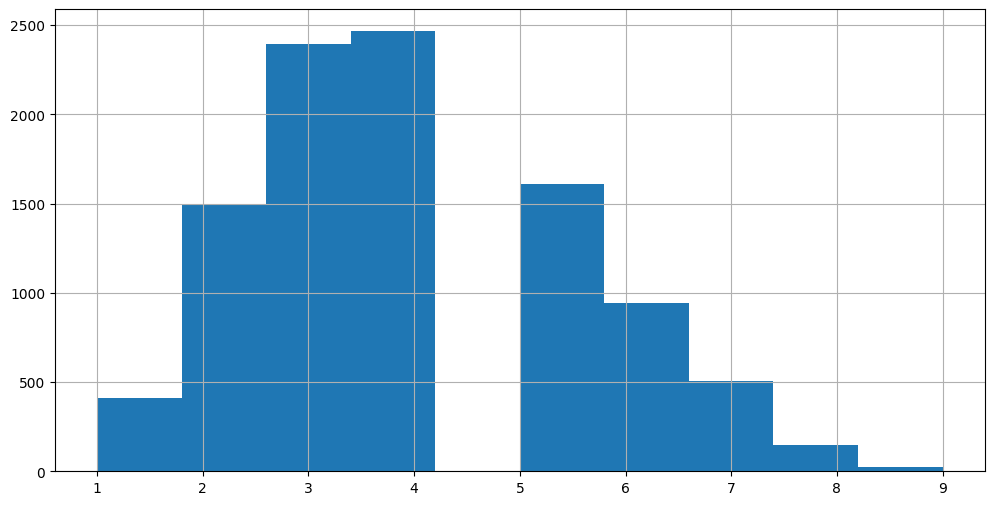

In [23]:
data["Average_Wait_Time_cat"] = pd.cut(x= data["Average_Wait_Time"],
                               bins= [-10, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
                               labels= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] )

data["Average_Wait_Time_cat"].hist(figsize= (12, 6))


In [24]:
split = StratifiedShuffleSplit(n_splits= 1,
                               test_size= 0.2,
                               random_state= 42,
                               )

strat_train_set = pd.DataFrame()
strat_test_set = pd.DataFrame()

for train_index, test_index in split.split(data.dropna(inplace= False), data["Average_Wait_Time_cat"].dropna(inplace= False)):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

display(strat_train_set.head(), strat_test_set.head())

,Day_of_Week,Hour,Department,Staff_Count,Num_Patients,Average_Wait_Time,Emergency_Load,Label,Month,Day,Average_Wait_Time_cat
656,Sunday,8,Emergency,6,23,47,Yes,High,6,5,5
3559,Tuesday,11,Surgery,14,20,42,No,High,4,24,5
5690,Saturday,6,Cardiology,14,30,61,No,High,1,11,7
5724,Tuesday,16,Emergency,6,30,49,Yes,High,5,26,5
708,Tuesday,8,Cardiology,9,19,46,No,Medium,8,5,5


,Day_of_Week,Hour,Department,Staff_Count,Num_Patients,Average_Wait_Time,Emergency_Load,Label,Month,Day,Average_Wait_Time_cat
1724,Friday,23,Radiology,15,17,33,Yes,Medium,3,19,4
2008,Thursday,9,Surgery,3,8,25,No,Low,2,10,3
1339,Thursday,13,Cardiology,7,22,33,Yes,High,8,12,4
5672,Thursday,4,Emergency,12,18,36,No,Medium,4,8,4
7565,Wednesday,7,Pediatrics,8,15,33,No,Medium,5,28,4


In [25]:
train_set, test_set = train_test_split(data,
                                       test_size= 0.2,
                                       random_state= 42,
                                       )

statum_table = pd.DataFrame(data= {
    "Overall" : data["Average_Wait_Time_cat"].value_counts() / len(data["Average_Wait_Time_cat"]),
    "Random" : test_set["Average_Wait_Time_cat"].value_counts() / len(test_set["Average_Wait_Time_cat"]),
    "Stratified" : strat_test_set["Average_Wait_Time_cat"].value_counts() / len(strat_test_set),
    "Random. %error": data["Average_Wait_Time_cat"].value_counts() / len(data["Average_Wait_Time_cat"]) - test_set["Average_Wait_Time_cat"].value_counts() / len(test_set["Average_Wait_Time_cat"]),
    "Strat. %error": data["Average_Wait_Time_cat"].value_counts() / len(data["Average_Wait_Time_cat"])  -  strat_test_set["Average_Wait_Time_cat"].value_counts() / len(strat_test_set["Average_Wait_Time_cat"]),
})
del train_set, test_set

display(statum_table.sort_values(by= "Average_Wait_Time_cat"))
data.drop(labels= 'Average_Wait_Time_cat', axis= 1, inplace= True)


,Overall,Random,Stratified,Random. %error,Strat. %error
Average_Wait_Time_cat,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0413,0.0370,0.0400,0.0043,0.0013
2,0.1497,0.1520,0.1365,-0.0023,0.0132
3,0.2395,0.2350,0.2470,0.0045,-0.0075
4,0.2465,0.2515,0.2560,-0.0050,-0.0095
5,0.1610,0.1570,0.1585,0.0040,0.0025
6,0.0945,0.0985,0.0975,-0.0040,-0.0030
7,0.0504,0.0485,0.0480,0.0019,0.0024
8,0.0145,0.0175,0.0160,-0.0030,-0.0015


# prepare the pipelines

In [26]:
X_train = strat_train_set.drop(labels= ['Num_Patients', 'Label'], axis= 1)
y_train_reg = strat_train_set.Average_Wait_Time
y_train_clf = strat_train_set.Label

X_test = strat_test_set.drop(labels= ['Num_Patients', 'Label'], axis= 1)
y_test_reg = strat_test_set.Average_Wait_Time
y_test_clf = strat_test_set['Label']

obj_fea, num_fea = split_features(data_= X_train, print_= True)

the string features in dataset: ['Day_of_Week', 'Department', 'Emergency_Load']
the string features in dataset: ['Hour', 'Staff_Count', 'Average_Wait_Time', 'Month', 'Day']


In [27]:
print(f'The shape of the training feature {X_train.shape}, regression label shape: {y_train_reg.shape}, classification label shape: {y_train_clf.shape}')
print(f'The shape of the testing feature {X_test.shape}, regression label shape: {y_test_reg.shape}, classification label shape: {y_test_clf.shape}')

The shape of the training feature (7999, 9), regression label shape: (7999,), classification label shape: (7999,)
The shape of the testing feature (2000, 9), regression label shape: (2000,), classification label shape: (2000,)


In [28]:
imputer = SimpleImputer(strategy= "median")

imputer_data = imputer.fit_transform(X_train[num_fea])

X_train_set_tr = pd.DataFrame(data= imputer_data, columns= num_fea)

print(imputer.statistics_)
X_train_set_tr.head()

[11.  9. 33.  5. 15.]


,Hour,Staff_Count,Average_Wait_Time,Month,Day
0,8.0,6.0,47.0,6.0,5.0
1,11.0,14.0,42.0,4.0,24.0
2,6.0,14.0,61.0,1.0,11.0
3,16.0,6.0,49.0,5.0,26.0
4,8.0,9.0,46.0,8.0,5.0


In [29]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X= X_train[num_fea])

X_train_scale = pd.DataFrame(
    data= X_train_scale,
    columns= num_fea
)
X_train_scale.head()

,Hour,Staff_Count,Average_Wait_Time,Month,Day
0,-0.481448,-0.800872,0.795635,0.268141,-1.166076
1,-0.050032,1.328928,0.475667,-0.463768,0.985270
2,-0.769058,1.328928,1.691544,-1.561631,-0.486704
3,0.668993,-0.800872,0.923622,-0.097814,1.211727
4,-0.481448,-0.002197,0.731641,1.000049,-1.166076


In [30]:
one_hot_encoder = OneHotEncoder()

X_train_set_en = one_hot_encoder.fit_transform(X_train[obj_fea])

print(X_train_set_en[10])
print(one_hot_encoder.categories_)

  (0, 3)	1.0
  (0, 7)	1.0
  (0, 13)	1.0
[array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object), array(['Cardiology', 'Emergency', 'Pediatrics', 'Radiology', 'Surgery'],
      dtype=object), array(['No', 'Yes'], dtype=object)]


In [31]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy= "median")),
    ('scaler', StandardScaler())
])

final_pipeline_reg\
    = ColumnTransformer(
    transformers= [
        ('num_pipeline', num_pipeline, num_fea),
        ('cat_pipeline', OneHotEncoder(), obj_fea)
    ]
)
X_train_prepared = final_pipeline_reg.fit_transform(X= X_train)
X_train_prepared = pd.DataFrame(data= X_train_prepared)
X_train_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.481448,-0.800872,0.795635,0.268141,-1.166076,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.050032,1.328928,0.475667,-0.463768,0.985270,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.769058,1.328928,1.691544,-1.561631,-0.486704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.668993,-0.800872,0.923622,-0.097814,1.211727,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.481448,-0.002197,0.731641,1.000049,-1.166076,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Regression

## Training Step

In [32]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_prepared, y_train_reg)

y_pred_reg = linear_reg.predict(X_train_prepared)

rmse = root_mean_squared_error(y_true= y_train_reg, y_pred= y_pred_reg)

print(f'the root mean squared error: {rmse}')

the root mean squared error: 1.8703979649479188e-14


In [33]:
forest_reg = RandomForestRegressor(random_state= 42)

forest_reg.fit(X_train_prepared, y_train_reg)

y_pred_forest = forest_reg.predict(X_train_prepared)

rmse = root_mean_squared_error(y_true= y_train_reg, y_pred= y_pred_forest)

print(f'the root mean squared error: {rmse}')

the root mean squared error: 0.026572556568672932


## Cross validation step:

In [34]:
def display_scores(score):
    print(f"the Scores: {score}")
    print(f"the Scores mean: {score.mean()}")
    print(f"the Scores std: {score.std()}")

In [35]:
linear_reg_score = cross_val_score(estimator= linear_reg, X= X_train_prepared, y= y_train_reg, cv= 4, scoring= 'neg_mean_squared_error')

display_scores(score= -linear_reg_score)

the Scores: [1.81797729e-28 3.39677195e-28 2.26333660e-28 2.05601698e-27]
the Scores mean: 7.009563902975065e-28
the Scores std: 7.844590977014672e-28


In [36]:
forest_reg_score = cross_val_score(estimator= forest_reg, X= X_train_prepared, y= y_train_reg, cv= 4, scoring= 'neg_mean_squared_error')

display_scores(score= forest_reg_score)

the Scores: [-0.00101745 -0.0255167  -0.0011441  -0.00055188]
the Scores mean: -0.0070575314844922455
the Scores std: 0.010659687057261724


In [37]:
xgboost_reg = XGBRegressor()

xgboost_reg_score = cross_val_score(estimator= xgboost_reg, X= X_train_prepared, y= y_train_reg, cv= 4, scoring= 'neg_mean_squared_error')

display_scores(score= -
xgboost_reg_score)

the Scores: [0.00059952 0.01952528 0.00106822 0.00086502]
the Scores mean: 0.005514510674402118
the Scores std: 0.008090828700842228


In [38]:
ridge_reg = Ridge(random_state= 42, alpha= 1e-1)

ridge_reg_score = cross_val_score(estimator= ridge_reg, X= X_train_prepared, y= y_train_reg, cv= 4, scoring= 'neg_mean_squared_error')

display_scores(score= -ridge_reg_score)

the Scores: [1.71775405e-07 1.56417195e-07 1.60097134e-07 1.55719933e-07]
the Scores mean: 1.6100241686991004e-07
the Scores std: 6.438278401936615e-09


In [39]:
nn_reg = Sequential(
    layers= [
        Input(shape= (19,), name= 'input_layer'),
        Dense(units= 32, activation= 'tanh', name= 'layer_1'),
        Dense(units= 12, activation= 'linear', name= 'layer_2'),
        Dense(units= 1, activation= 'linear', name= 'layer_3'),
    ]
)

In [40]:
nn_reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 32)                640       
                                                                 
 layer_2 (Dense)             (None, 12)                396       
                                                                 
 layer_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1049 (4.10 KB)
Trainable params: 1049 (4.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
nn_reg.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3),
    loss= tf.keras.losses.mean_squared_error
)

In [42]:
nn_reg.fit(X_train_prepared, y_train_reg, epochs= 30)

Epoch 1/30
250/250 [==============================] - 1s 729us/step - loss: 689.4257
Epoch 2/30
250/250 [==============================] - 0s 764us/step - loss: 23.4570
Epoch 3/30
250/250 [==============================] - 0s 695us/step - loss: 9.9754
Epoch 4/30
250/250 [==============================] - 0s 698us/step - loss: 6.9032
Epoch 5/30
250/250 [==============================] - 0s 671us/step - loss: 4.5654
Epoch 6/30
250/250 [==============================] - 0s 682us/step - loss: 2.9846
Epoch 7/30
250/250 [==============================] - 0s 679us/step - loss: 1.9671
Epoch 8/30
250/250 [==============================] - 0s 675us/step - loss: 1.2977
Epoch 9/30
250/250 [==============================] - 0s 684us/step - loss: 0.8617
Epoch 10/30
250/250 [==============================] - 0s 675us/step - loss: 0.5924
Epoch 11/30
250/250 [==============================] - 0s 658us/step - loss: 0.4128
Epoch 12/30
250/250 [==============================] - 0s 788us/step - loss: 0.302

## Testing step:

In [43]:
X_test_prepared = final_pipeline_reg.transform(X_test)

linear_test_score_reg = cross_val_score(estimator= linear_reg, X= X_test_prepared, y= y_test_reg, cv= 3, scoring= 'neg_mean_squared_error')
forest_test_score_reg = cross_val_score(estimator= forest_reg, X= X_test_prepared, y= y_test_reg, cv= 3, scoring= 'neg_mean_squared_error')
xgboost_test_score_reg = cross_val_score(estimator= xgboost_reg, X= X_test_prepared, y= y_test_reg, cv= 3, scoring= 'neg_mean_squared_error')
ridge_test_score_reg = cross_val_score(estimator= ridge_reg, X= X_test_prepared, y= y_test_reg, cv= 3, scoring= 'neg_mean_squared_error')


display_scores(-linear_test_score_reg)
print('=' * 10)
display_scores(-forest_test_score_reg)
print('=' * 10)
display_scores(-xgboost_test_score_reg)
print('=' * 10)
display_scores(-ridge_test_score_reg)
print('=' * 10)


the Scores: [2.27892099e-28 2.46834222e-28 7.40306872e-28]
the Scores mean: 4.050110644631154e-28
the Scores std: 2.3721601947891597e-28
the Scores: [0.00432474 0.0052009  0.03003889]
the Scores mean: 0.013188175356766092
the Scores std: 0.011920621483612504
the Scores: [0.0085736  0.00409037 0.01648801]
the Scores mean: 0.009717323972533146
the Scores std: 0.00512552048580848
the Scores: [3.28278445e-06 3.69778482e-06 3.85437176e-06]
the Scores mean: 3.6116470090561846e-06
the Scores std: 2.4116771913906245e-07


# classification training:

In [44]:
X_train_prepared.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.481448,-0.800872,0.795635,0.268141,-1.166076,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,-0.050032,1.328928,0.475667,-0.463768,0.985270,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,-0.769058,1.328928,1.691544,-1.561631,-0.486704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.668993,-0.800872,0.923622,-0.097814,1.211727,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,-0.481448,-0.002197,0.731641,1.000049,-1.166076,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
ordinal_encoder = OrdinalEncoder()

y_train_clf_en = ordinal_encoder.fit_transform([y_train_clf])

y_train_clf_en = pd.Series(y_train_clf_en[0])

y_train_clf_en.unique()

array([0.])

In [46]:
def divide_test_set(x):
    if x == 'High':
        return 2
    elif x == 'Medium':
        return 1
    else:
        return 0

y_train_clf_en1 = y_train_clf.apply(lambda x : divide_test_set(x))
y_train_clf_en1.unique()

array([2, 1, 0], dtype=int64)

In [47]:
y_train_clf = y_train_clf_en1

y_train_clf.head()

656     2
3559    2
5690    2
5724    2
708     1
Name: Label, dtype: int64

## Training step:

In [48]:
def clf_scores(y_true, y_pred, model, average):

    print(f'the precision score of {model}: {precision_score(y_true= y_true, y_pred= y_pred, average= average)}')
    print(f'the recall score of {model}: {recall_score(y_true= y_true, y_pred= y_pred, average= average)}')
    print(f'the f1 score of {model}: {f1_score(y_true= y_true, y_pred= y_pred, average= average)}')


In [49]:
linear_clf = LogisticRegression()

linear_clf.fit(X= X_train_prepared, y= y_train_clf)

y_linear_predict_clf = linear_clf.predict(X= X_train_prepared)

clf_scores(y_true= y_train_clf, y_pred= y_linear_predict_clf, model= "logistic Regression", average= 'macro')

the precision score of logistic Regression: 0.832013393361629
the recall score of logistic Regression: 0.8244663341298041
the f1 score of logistic Regression: 0.8277725117558733


## Cross-validation:

In [50]:
y_linear_score_clf = cross_val_predict(estimator= linear_clf, X= X_train_prepared, y= y_train_clf, cv= 3)

clf_scores(y_true= y_train_clf, y_pred= y_linear_score_clf, model= 'Logistic Regression', average= 'macro')

the precision score of Logistic Regression: 0.8301660491882193
the recall score of Logistic Regression: 0.8226863854290308
the f1 score of Logistic Regression: 0.8259609544365882


In [51]:
forest_clf = RandomForestClassifier(random_state= 42)

y_forest_score_clf = cross_val_predict(estimator= forest_clf, X= X_train_prepared, y= y_train_clf, cv= 3)

clf_scores(y_true= y_train_clf, y_pred= y_forest_score_clf, model= 'Random Forest Classifier', average= 'macro')

the precision score of Random Forest Classifier: 0.8288211061576707
the recall score of Random Forest Classifier: 0.8178371001236581
the f1 score of Random Forest Classifier: 0.8223573606636391


In [52]:
xgboost_clf = XGBClassifier()

y_xgboost_score_clf = cross_val_predict(estimator= xgboost_clf, X= X_train_prepared, y= y_train_clf, cv= 3)

clf_scores(y_true= y_train_clf, y_pred= y_xgboost_score_clf, model= 'XGBoost', average= 'macro')

the precision score of XGBoost: 0.8129158910439486
the recall score of XGBoost: 0.8078021294980791
the f1 score of XGBoost: 0.8100906729955382


In [53]:
ridge_clf = RidgeClassifier(random_state= 42)

y_ridge_score_clf = cross_val_predict(estimator= ridge_clf, X= X_train_prepared, y= y_train_clf, cv= 3)

clf_scores(y_true= y_train_clf, y_pred= y_ridge_score_clf, model= 'Logistic Regression', average= 'macro')

the precision score of Logistic Regression: 0.8071603101425726
the recall score of Logistic Regression: 0.7813557008369592
the f1 score of Logistic Regression: 0.786352414570385


## Testing step:

In [54]:
y_test_clf_en1 = y_test_clf.apply(lambda x : divide_test_set(x))
print(y_test_clf_en1.value_counts())
print('=' * 100)
print(y_test_clf.value_counts())

Label
1    823
2    693
0    484
Name: count, dtype: int64
Label
Medium    823
High      693
Low       484
Name: count, dtype: int64


In [55]:
y_test_clf = y_test_clf_en1
y_test_clf.head()

1724    1
2008    0
1339    2
5672    1
7565    1
Name: Label, dtype: int64

In [56]:
y_linear_score_clf_test = cross_val_predict(estimator= linear_clf, X= X_test_prepared, y= y_test_clf, cv= 3)

clf_scores(y_true= y_test_clf, y_pred= y_linear_score_clf_test, model= 'Logistic Regression', average= 'macro')

the precision score of Logistic Regression: 0.8289732114806441
the recall score of Logistic Regression: 0.8208429282382669
the f1 score of Logistic Regression: 0.8244563675211091


In [57]:
y_xgboost_score_clf_test = cross_val_predict(estimator= xgboost_clf, X= X_test_prepared, y= y_test_clf, cv= 3)

clf_scores(y_true= y_test_clf, y_pred= y_xgboost_score_clf_test, model= 'XGBoost Classifier', average= 'macro')

the precision score of XGBoost Classifier: 0.8009352130394318
the recall score of XGBoost Classifier: 0.7940326771101102
the f1 score of XGBoost Classifier: 0.7971499668393028


# Models uploading:

In [58]:
reg_model = linear_reg
clf_model = linear_clf

import os
os.makedirs('.', exist_ok=True)

# Save the model
dump(reg_model, 'regression_model.joblib')
dump(clf_model, 'classification_model.joblib')


['classification_model.joblib']

In [59]:
model = load('regression_model.joblib')


In [60]:
cross_val_score(estimator= model, X= X_test_prepared, y= y_test_reg, cv= 3, scoring= 'neg_mean_squared_error')

array([-2.27892099e-28, -2.46834222e-28, -7.40306872e-28])